# Mining Child Homicides in Los Angeles County

<img src="https://github.com/elisegia/coroner_data/blob/master/Screen%20Shot%202020-04-13%20at%202.07.09%20PM.png?raw=true" />
## Background
The new documentary called "The Trials of Gabriel Fernandez" brings to the forefront the horrendous abuse that children in Los Angeles County and elsewhere endure at the hands of their caregivers. The documentary is a six-part miniseries about the 2013 murder of Gabriel Fernandez, an 8-year old Palmdale boy, that aired on Netflix February, 2020. In 2013, Gabriel Fernandez died in the neighborhood of LA county called Palmdale. For years, Gabriel was abused by his mother and her boyfriend. The abuse included being beaten, shot with a BB gun, smothered with pepper spray, made to wear girl’s clothes to school, forced to eat his own vomit, and locked in a cabinet with a sock stuffed in his mouth. His biological father was incarcerated previously. From 2003 – 2012 over 60 complaints were filed leading to 8 investigations by Child Protective Services. His mother and her boyfriend were given life sentences for his death. The social workers were charged with felony child abuse and falsifying public documents. 

The case of Gabriel Fernandez demonstrates the complexity of the risk factors and the profound psychological impact that fatal child maltreatment has on members of the community. It also highlights aspects of our social, legal and criminal justice systems that are in desperate need of reform. Gabriel’s teacher, family and even the prosecutor discussed the psychological toll it took on them. Apparently, their pleas for help from Child Protective Services were of no avail. 

What first piqued my interest about this case is that it happened again, about 5 years later, when 4-year old Anthony Alvalos was murdered 15 minutes from Garbiel’s home. The cases were almost identical, even regarding the fact that Anthony’s parents thought he, too, was gay.

## My Work
As a researcher of child abuse and neglect, I have known about the Gabriel Fernandez case for years. My own work explores the structural aspects of child welfare across time and space. If I could boil this work down to one central message it would be that neighborhood characteristics, in addition to the characteristics of children and families, are critical components of child maltreatment prevention. Nevertheless, the characteristics of neighborhoods are often overlooked in preventive interventions. The characteristics of neighborhoods are important to understand for many reasons. One of the most important reasons is because they reflect the structural components of race and class and how they play themselves out in the area of child abuse. 

## The Problem
One difficulty that I have encountered in my research is the lack of data on child abuse and neglect, particularly that which pertains to child homicides. This has forced me to think outside the box about data and data collection efforts. As a methodologist, as well, I understand full well that innovative methods of machine learning are going to be an important component of applied research. Whereas it is relatively easy to give answers to well-structured questions, when there is no structure to the data standard statistical analyses are inapplicable. Unstructured data makes up 80-90% of all data produced by organizations (Holzinger, Stocker et al., 2013) including police reports, court documents and human service organizations. In order to understand patterns in such data, machine learning algorithms such as text mining and topic modeling can help given meaning to narrative, unstructured text. Therefore, understanding the power of data science, including web scraping and text mining, is a critical part of developing a holistic approach to child protection. In this first article, I will illustrate how I created a dataset of all child homicides in Los Angeles County by scraping the Los Angeles Times Homicide report located [here](https://homicide.latimes.com/)

The first step (see figure 1) in this project was to collect geospatial data on child homicides. 

| <img src="https://github.com/elisegia/coroner_data/blob/master/image.png?raw=true" /> | 
|:--:| 
| *Figure 1. Diagram of the Research Process* |

## Preliminaries
I am using Python to perform the web scraping, data cleaning and mapping. Before you begin, make sure you have the latest version of Python installed on your computer. I used homebrew for the installation and it is straghtforward if you follow the steps listed here. Next, in order to scrape the website, you must make sure to install the following packages. To do so, you can type the following in the terminal window on a Mac or Unix machine: 

```python
pip3 install [package.name]
```

Below are the packages I used for the webscraping. 

In [ ]:

import pandas as pd  
from pandas import ExcelWriter
pd.options.mode.chained_assignment = None # see https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

import urllib
from selenium.webdriver.support.ui import WebDriverWait

import numpy as np
import urllib
from urllib.parse import urljoin


from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import time
from bs4 import BeautifulSoup as bs
import requests
import re

## Data Extraction
To understand the process, first go to the LA Times website and right under the map there is a search feature. Click the 'More' button to perform an advanced search. Click the down arrow next to the box that says 'Last 12 months' and select 'All years' (which is the last option). Then click the down arrow next to the box that says 'Age' and select 0-5. This search will result in all homicides to children under the age of 6 years old spanning 2000 - 2020. Some of the results are shown in figure 3.

  
|Selecting the Cases| Results |
|:--:|:--:|
| <img src="https://github.com/elisegia/coroner_data/blob/master/Picture1.png?raw=true" />    |<img src="https://github.com/elisegia/coroner_data/blob/master/Picture2.png?raw=true" />     |
|*Figure 2. Advanced Search Feature*  |*Figure 3. Search Results*      |


If you go to the L.A. Times website, you will notice that the page loads dynamically. Therefore, flow is to wait for the webpage to load, grab the data, then simulate scrolling down the page in order to grab the next few homicides, and repeat until all of the homicide cases are downloaded.

In [5]:
chrome_options = Options()
chrome_options.add_argument('disable_infobars')

# Start the WebDriver and load the page
wd = webdriver.Chrome(options=chrome_options)
wd.delete_all_cookies()
wd.set_page_load_timeout(30)

wd.get('https://homicide.latimes.com/age/0/year/all')
time.sleep(20)

html_page = wd.page_source
soup = bs(html_page, 'lxml')
result1 = soup.find_all('article', attrs={'post-teaser row'})

last_height = 0

while True:

    wd.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    time.sleep(3)
    
    html_page = wd.page_source
    soup2 = bs(html_page, 'lxml')
    
    time.sleep(2)
   
    #break condition
    new_height = wd.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
    
results = soup2.find_all('div', attrs={'post-teaser row'})

wd.quit()

In [6]:
all_deaths_under_6 = result1 + results
test = soup2.find_all('div', attrs={'post-teaser row'})
test1 = soup2.find_all('article', attrs={'post-teaser row'})
all_deaths_under_6_div = test + test1
print ('There were {} child homicides of children under 6 in LA County since 1/1/2000'.format(str(len(all_deaths_under_6_div))))

There were 471 child homicides of children under 6 in LA County since 1/1/2000


In [7]:
all_deaths_under_6_div[0] 

<div class="post-teaser row">
<aside class="span2 offset1 hidden-phone">
<img class="post-list-thumb" src="https://api.mapbox.com/styles/v1/mapbox/streets-v11/static/url-https%3A%2F%2Fdxnhdpa68jufb.cloudfront.net%2Fstatic%2Fhomicide%2Fimg%2Fmarker.png(-118.110225684,34.0201045958)/-118.110225684,34.0201045958,12,0,0/135x135?access_token=pk.eyJ1IjoibGF0aW1lcyIsImEiOiJjajhvcXRraGUwNnlwMzNyczR3cTBsaWh1In0.0cPKLwe2A0ET4P5CtWSiLQ"/>
<div class="post-list-badge">
                Died on
                <div class="death-date">Aug. 6</div>
<ul class="badge-location">
<li>
<a href="/neighborhood/montebello/year/all">
                            Montebello
                        </a>
</li>
<li>1200 W. Victoria Ave.</li>
</ul>
</div>
</aside>
<article class="span8 post-list-content">
<hgroup>
<h2><a href="/post/unknown-fetus/">Baby Acosta
</a></h2>
<p class="byline visible-desktop">By <span class="author"><a href="mailto:jerome.campbell@latimes.com">Jerome Campbell</a></span></p>
<p class="post

## Results
There were 470 child homicides during the period. The code above grabbed all of the data that is on the website. The following code parses the text so that it can be stored as data in a data frame. To do so, it is necessary to find all of the unlinked lists (ul's) with class label 'badge-location' to store the child's name, death date, spatial coordinates (which are located in the tag for the image source, as well as the race, gender, age and cause of death listed by the medical-examiner, coroner. Finally, in order to perform textual analysis (e.g., Latent Dirichlet Allocation modeling) the code grabs the description of the details surrounding the death as well as the LA Times reporting of the death.

In [8]:
BASE_URL = 'https://homicide.latimes.com/'

url = []
uls = []
clist = []
cname = []
b = []
c = []
d = []
e = []
f = []
g = []

j=0
for r in all_deaths_under_6_div:

    containers = r.findAll("ul",{"class" : lambda L: L and L.startswith('badge-location')})   #Find all ul with class: badge-location
    
    for container in containers: 
        c_names = containers[j].findAll("li")

        for i in range(len(c_names)):
            c_name = c_names[0]
            c_mod_name = c_name.text.split(',')
            c_mod_name = [item.replace("\n", "") for item in c_mod_name]
            c_mod_name = [x.strip(' ') for x in c_mod_name]
            i +=1    
        
        cname = c_mod_name

    death_date = r.find('div', 'death-date').text.strip() if r.find('div', 'death-date').text.strip() is not None else ''
    name = r.find("h2").text  if r.find("h2").text  is not None else ''
    name = name.replace("\n", "")

    try:
        coords =  r.img['src'].split("/")[8] 
    except IndexError:
        coords = ''
        pass
    except TypeError:
        coords = ''
        pass

    post_date = r.find('p', 'post-date').text.strip() if r.find('p', 'post-date').text.strip() is not None else ''
    race = r.find("a", href=re.compile("race")).text.strip() if r.find("a", href=re.compile("race")) is not None else ''
    gender = r.find("a", href=re.compile("gender")).text.strip() if r.find("a", href=re.compile("gender")) is not None else ''
    cause = r.find("a", href=re.compile("cause")).text.strip() if r.find("a", href=re.compile("cause"))  is not None else ''
    s_descript = r.find('div', 'body').text.strip() if r.find('div', 'body').text.strip() is not None else ''

    a = r.find('a', href=re.compile("post"))
    url = urljoin(BASE_URL, a.attrs['href'])
    soup = bs(urllib.request.urlopen(url).read())
    title = soup.find('section', class_="body")

    article_text = ''
    article = soup.find('section', class_="body").findAll('p')
    
    for element in article:
        article_text += '\n' + ''.join(element.findAll(text = True))
    article_text = article_text.replace("\n", "")

    data = soup.find('ul', class_="aspects")
    
    for d in data: 
        lis = data.findAll('li')
        
        for k in range(len(lis)):
            try:
                aname = lis[2]
                t = [lis[0].text, lis[1].text,lis[2].text,lis[3].text,lis[4].text, lis[5].text, lis[6].text]
                myString = "::".join(t )
                myString.replace(' ', '0')
                a,b,c,d,e,f,g = myString.split('::')
                k +=1    
            except IndexError:
                pass
            
    clist.append((cname, death_date, post_date, name, race, gender, cause, coords, s_descript, article_text, c, d, e, f, g, a, b))

j+=1

In order to see the article text (stored in position 9) for the 10th record type the following:

In [9]:
clist[10][9]

'Jennabel Anaya, a 4-year-old Latina, died Sunday, Aug. 7, after she was shot in the intersection of East 9th Street and Locust Avenue in Long Beach, according to Los Angeles County coroner’s records.\xa0City and county authorities announced Friday a $40,000 reward for information leading to the arrest and conviction of the person who killed Anaya and her mother, Carina Mancera, 26.\xa0The girl was walking home from the grocery store with her mother and father, Luis Anaya, on Aug. 6, when a man approached the family about 10:20 p.m. and began shooting, according to Long Beach Police Sgt. Robert Woods.\xa0Mancera, 26, was pronounced dead at the scene at 10:27 p.m., according to coroner’s records. Jennabel was taken to a nearby hospital, where she was pronounced dead at 12:01 a.m. Aug. 7, according to coroner’s records.\xa0Luis Anaya escaped unscathed. During a memorial at the shooting site Sunday, he and others recounted what they heard and saw that evening.\xa0Anaya told The Times\xa0h

It is obvious from the text that the baby is a newborn who was beaten to death. The cause of death listed in the coroner's report is blunt force trauma, however it should be obvious that this is a case of severe child physical abuse.

The data needs to be cleaned and preprocessed prior to visualization. The code below cleans a few of the columns that will serve as preliminary analyses.

In [10]:
df = pd.DataFrame(clist, columns=['c_name', 'death_date', 'post_date', 'name', 'race', 'gender', 'cause', 'coords', 's_descript', 'article_text', 'c', 'd', 'e', 'f', 'g', 'a', 'b'])
df['post_date'] = df.post_date.str.replace('Posted' , '')
df['causes'] = df.e.str.replace('Cause:' , '')
df['brace'] = df.f.str.replace('Race/Ethnicity:' , '')

df['hood'] = df['a'].str.replace('href','')

df['post_date'] = pd.to_datetime(df['post_date'])
df['year'], df['month'], df['day'] = df['post_date'].apply(lambda x: x.year), df['post_date'].apply(lambda x: x.month), df['post_date'].apply(lambda x: x.day)

df[['y', 'x']] = df['coords'].str.split(',', n = 1, expand = True)
df[['x', 'd']] = df['x'].str.split(')', n = 1, expand = True)

df.apply(lambda x:'%s, %s' % (x['death_date'],x['year']),axis=1)

df[['d1', 'y']] = df['y'].str.split('(', n = 1, expand = True)
df.to_csv('child_deaths_all_0to5_covid.csv', sep=',')

In [11]:
from src import maps
from src import charts
#from src import geocoder
from src import transform
from src import calculate
#from googlegeocoder import GoogleGeocoder


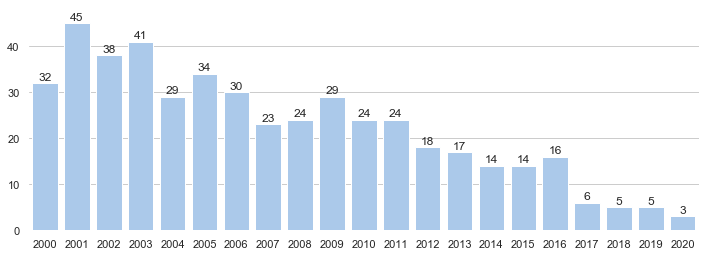

In [12]:
charts.bar(df.year.value_counts(), figwidth=12)

As the chart above shows, child homicides peaked in 2001 and an overall downward trend emerges over the twenty year period. The year 2020 only contains data up through April.

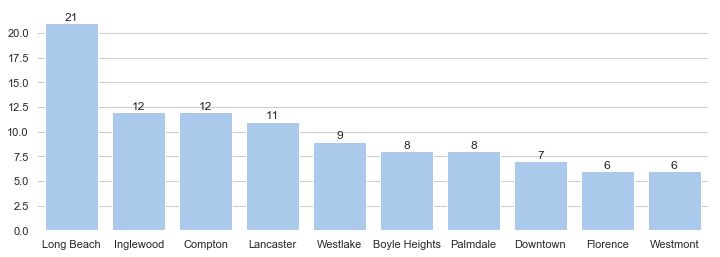

In [13]:
charts.bar(df.hood.value_counts().nlargest(10), figwidth=12)

Long Beach, Inglewood and Compton have the most child homicides across the county. These 10 neighborhoods comprise about 1/4 of all child homicides. As we will see below, there are many neighborhoods that have had no child homicides for the whole 20 year period.

In [14]:
df = df[['causes','x', 'y', 'brace']]

In [15]:
df1 = df[df['brace'].str.contains("Black") | df['brace'].str.contains('White')| df['brace'].str.contains('Latino')| df['brace'].str.contains('Asian')] 
df1

,causes,x,y,brace
2,Other,34.0735139958,-117.743378284,Black
3,Gunshot,33.9704218958,-118.298415884,Black
4,Gunshot,None,None,Black
5,Other,33.9253019958,-118.214549784,Black
6,Stabbing,34.0293628958,-118.239681284,Latino
...,...,...,...,...
466,Gunshot,None,None,Asian
467,Gunshot,None,None,Asian
468,Other,34.0241573958,-118.259306384,Black
469,Other,None,None,Black


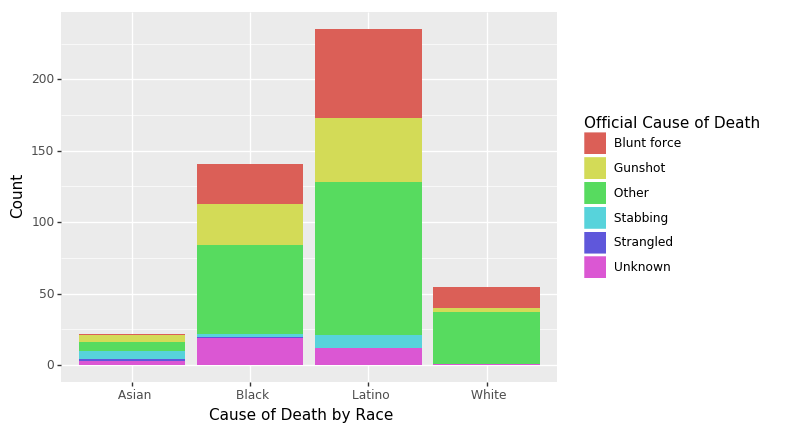

<ggplot: (327759929)>

In [17]:
from plotnine import *
(ggplot(df1) + 
  aes(x='brace', fill='causes') +
  geom_bar() +
  labs(x = "Cause of Death by Race", y = "Count", fill = "Official Cause of Death"))

From the chart above, it is apparent that Black and Latino children are more likely to be killed by gun violence.

In [18]:
df_complete = df.dropna(subset=['x', 'y'])
df_complete['y'] = pd.to_numeric(df_complete['y'], errors='coerce')
df_complete['x'] = pd.to_numeric(df_complete['x'], errors='coerce')

In [19]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [20]:
shape=gpd.read_file('/Users/giabarboza/Downloads/l.a. county neighborhood (v5).shp')
geometry = [Point(xy) for xy in zip(df_complete.y, df_complete.x)]
#df_complete = df_complete.drop(['x', 'y'], axis=1)
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(df_complete, crs=crs, geometry=geometry)

/Users/giabarboza/.pyenv/versions/3.5.4/lib/python3.5/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [21]:
import matplotlib

import matplotlib.dates as mdates
from matplotlib.ticker import StrMethodFormatter
import matplotlib.pyplot as plt

import seaborn as sns


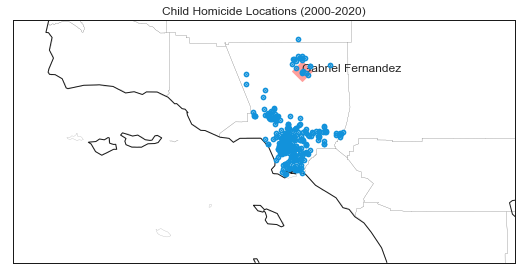

In [22]:
import os

from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(9, 5))

#Let's create a map centered over Los Angeles, CA (34.0522° N, 118.2437° W) and extending 10 degrees W-E and 5 degrees N-S
my_coords = [34.587234,-118.126193]

map = Basemap(projection='merc',llcrnrlon=-121.,llcrnrlat=33.,urcrnrlon=-116.,urcrnrlat=35.,resolution='i') # projection, lat/lon extents and resolution of polygons to draw
# resolutions: c - crude, l - low, i - intermediate, h - high, f - full

map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF') # can use HTML names or codes for colors
map.drawcounties() # you can even add counties (and other shapefiles!)
map.drawmapboundary()

# Plot the data
mxy = map(gdf["y"].tolist(), gdf["x"].tolist())
map.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=4, alpha=1, zorder=5)

x, y = map(my_coords[1], my_coords[0])
zoom_scale = 1
map.plot(x,y,marker='D',color='r', markersize=14)
plt.text(x, y, 'Gabriel Fernandez')

plt.title("Child Homicide Locations (2000-2020)")
plt.savefig('gabriel_fernandez.png', format='png', dpi=500)
plt.show() #draw map

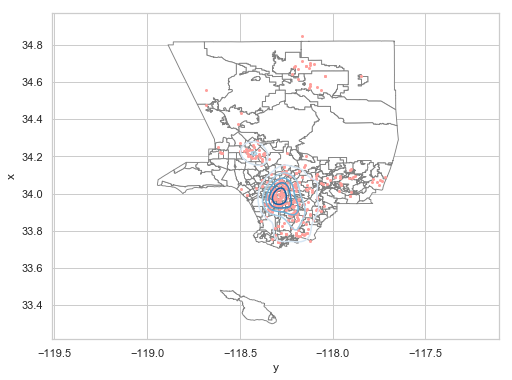

In [23]:
f, ax = plt.subplots(1, figsize=(8, 6))
f.patch.set_facecolor('xkcd:white')
shape.plot(ax=ax, color='white',   edgecolor='gray' , linewidth=.9)
ax = gdf.plot(ax=ax,marker='o', color='r', markersize=4)
sns.kdeplot(gdf['y'], gdf['x'], n_levels=5,  cmap="Blues", shade=False, shade_lowest=True, ax=ax)
plt.axis('equal')

plt.show()

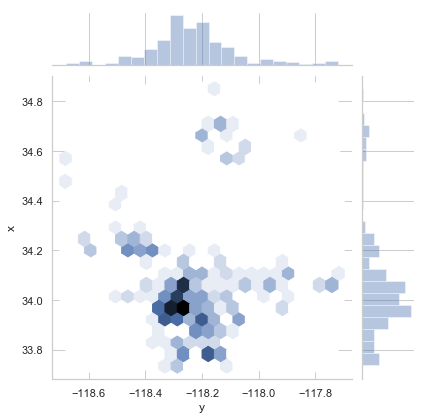

In [24]:
graph = sns.jointplot(x = 'y',y = 'x',data = gdf,kind = 'hex')

## Summary
The maps above show the locations of child homicides acoss the county. The maps show a strong spatial clustering in the city of Los Angeles. The number of child homicides decreased over the years, however it is possible that we see an increase in child deaths due to maltreatment as a result of the COVID-19 outbreak. These data should be monitored so that preventive interventions can be targeted to the communities that are in most need.